### Flights Dataset

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = sns.load_dataset("flights")

In [3]:
# Basic info
print("Shape:", df.shape)
print(df.info())
print(df.describe())
print(df.isnull().sum())

Shape: (144, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB
None
              year  passengers
count   144.000000  144.000000
mean   1954.500000  280.298611
std       3.464102  119.966317
min    1949.000000  104.000000
25%    1951.750000  180.000000
50%    1954.500000  265.500000
75%    1957.250000  360.500000
max    1960.000000  622.000000
year          0
month         0
passengers    0
dtype: int64


In [4]:
df.head(5)

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [6]:
# Check duplicates
print("Duplicates:", df.duplicated().sum())

# No missing values, but let's verify
print("Missing Values:\n", df.isnull().sum())

# Ensure 'month' is categorical and ordered correctly
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df['month'] = pd.Categorical(df['month'], categories=months, ordered=True)

# Sort values by year and month
df = df.sort_values(by=['year', 'month']).reset_index(drop=True)


Duplicates: 0
Missing Values:
 year          0
month         0
passengers    0
dtype: int64


In [7]:
print(df.describe())

              year  passengers
count   144.000000  144.000000
mean   1954.500000  280.298611
std       3.464102  119.966317
min    1949.000000  104.000000
25%    1951.750000  180.000000
50%    1954.500000  265.500000
75%    1957.250000  360.500000
max    1960.000000  622.000000


## Visualization with Matplotlib

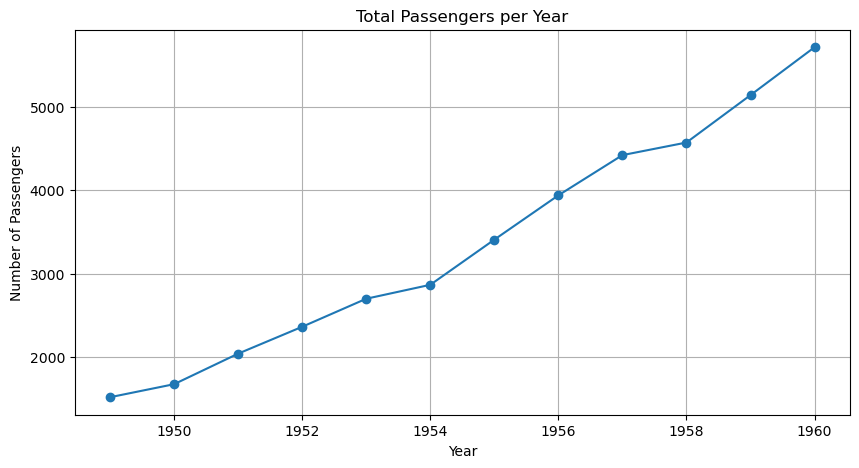

In [8]:
plt.figure(figsize=(10,5))
plt.plot(df.groupby('year')['passengers'].sum(), marker='o')
plt.title("Total Passengers per Year")
plt.xlabel("Year")
plt.ylabel("Number of Passengers")
plt.grid(True)
plt.show()


## Insight:
### July and August have the highest traffic, suggesting peak travel season.
### Early months (Jan–Feb) show lower passenger counts — likely off-season travel.

### Visualization with Seaborn

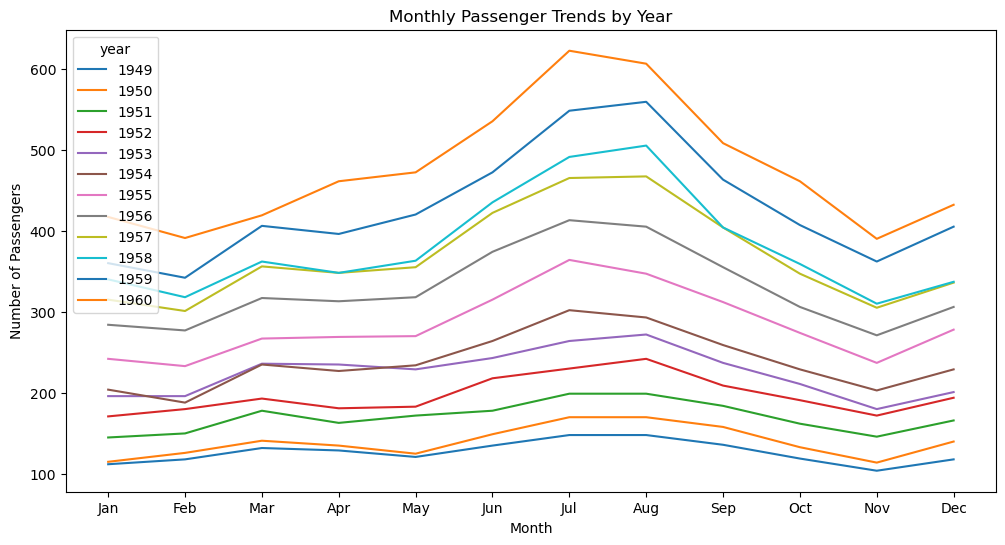

In [10]:
plt.figure(figsize=(12,6))
sns.lineplot(x='month', y='passengers', hue='year', data=df, palette='tab10')
plt.title("Monthly Passenger Trends by Year")
plt.xlabel("Month")
plt.ylabel("Number of Passengers")
plt.show()


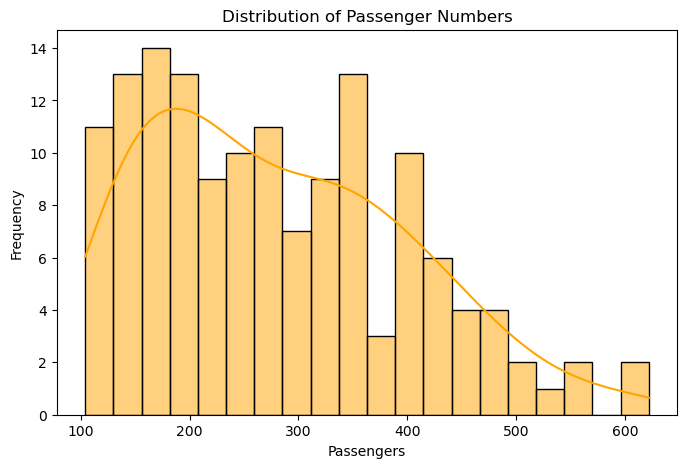

In [11]:
plt.figure(figsize=(8,5))
sns.histplot(df['passengers'], kde=True, bins=20, color='orange')
plt.title("Distribution of Passenger Numbers")
plt.xlabel("Passengers")
plt.ylabel("Frequency")
plt.show()


## Insight:
### Passenger counts are right-skewed, showing that higher counts became more common over the years.